# Taohid Shadat - Assignment 2

## Predicting Emotions of News Contents Using Sentiment Analysis (3 points)

- In this question, we will apply sentiment analysis on financial news headlines from a given data set.

- By doing so, we can understand the emotion behind the headlines and predict whether the market is being positive or negative toward a stock.

In [208]:
###(1) Import the necessary library and load the news_data csv file.
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [209]:
df = pd.read_csv('news_data.csv')

In [210]:
df.head()

,ticker,date,time,headline
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ..."
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?


In [211]:
###(2) Use VADER Sentiment Analyer and derive pos/neu/neg/compound sentiment scores for every news headlines.
###(3) Merge the sentiment outputs to the existing data set. 
### As a result, you will have 500rows & 8 cloumns in your data set such as ticker, date, time, headline, pos,neu,neg,compound.

In [212]:
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos'], sentiment_dict['compound']

In [213]:
df['sentiment_scores']= df['headline'].apply(sentiment_scores)
new_cols = ['neg', 'neu', 'pos', 'compound']
for i, col in enumerate(new_cols):
    df[col] = df['sentiment_scores'].apply(lambda x: x[i])

In [214]:
df.head()

,ticker,date,time,headline,sentiment_scores,neg,neu,pos,compound
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...","(0.0, 0.631, 0.369, 0.4767)",0.0,0.631,0.369,0.4767
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,"(0.0, 1.0, 0.0, 0.0)",0.0,1.000,0.000,0.0000
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,"(0.0, 1.0, 0.0, 0.0)",0.0,1.000,0.000,0.0000
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,"(0.0, 1.0, 0.0, 0.0)",0.0,1.000,0.000,0.0000
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,"(0.0, 0.698, 0.302, 0.3818)",0.0,0.698,0.302,0.3818


In [215]:
df.dtypes

ticker               object
date                 object
time                 object
headline             object
sentiment_scores     object
neg                 float64
neu                 float64
pos                 float64
compound            float64
dtype: object

In [216]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [217]:
df['date'] = df['datetime'].dt.date

In [218]:
df = df.sort_values(by = 'datetime')

In [219]:
df.head()

,ticker,date,time,headline,sentiment_scores,neg,neu,pos,compound,datetime
199,fb,2018-09-18,12:50PM,Facebook Is Facing a Legal Battle with ACLU & CWA,"(0.215, 0.661, 0.124, -0.2732)",0.215,0.661,0.124,-0.2732,2018-09-18 12:50:00
198,fb,2018-09-18,01:00PM,"CLASS ACTION UPDATE for TSLA, RMTI and FB: Lev...","(0.0, 1.0, 0.0, 0.0)",0.000,1.000,0.000,0.0000,2018-09-18 13:00:00
197,fb,2018-09-18,01:24PM,"Facebook Can't Settle an Ad Bias Claim, Draws ...","(0.31, 0.69, 0.0, -0.3818)",0.310,0.690,0.000,-0.3818,2018-09-18 13:24:00
196,fb,2018-09-18,01:24PM,"Facebook Can't Settle One Ad Bias Claim, Gets ...","(0.123, 0.877, 0.0, -0.1027)",0.123,0.877,0.000,-0.1027,2018-09-18 13:24:00
195,fb,2018-09-18,01:40PM,The Tesla of China & the Facebook-Macy's Conne...,"(0.0, 0.752, 0.248, 0.5106)",0.000,0.752,0.248,0.5106,2018-09-18 13:40:00


In [220]:
### (4) Visualize your outputs for one single day for one particular stock.
### Pick one of the tickers, say fb, and a certain date, say 2019 Jan 03, and 
### plot how the news sentiment (pos,neu,neg this time) changes over time within that day.
### you can generate separate plots for each sentiment category and overlay the plots all together at once.
### Although there's no one exact way to do this, such plot may work, refer plot 2 (it's called "stacked" bar chart).

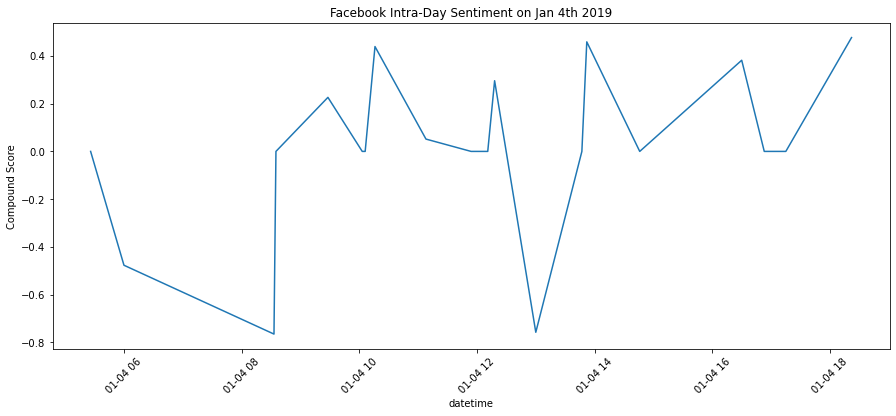

In [221]:
#One way to create a sub-data set for (4):
#take out fb ticker only, keep the rows where date is Jan 03 2019.
#Sort the rows by time and based on the final version, generate a plot.
plt.figure(figsize=(15, 6))
sns.lineplot(data = df[(df['date'] == datetime.date(2019, 1, 4)) & (df['ticker'] == 'fb')], x = 'datetime', y = 'compound')
plt.ylabel('Compound Score')
plt.title('Facebook Intra-Day Sentiment on Jan 4th 2019')
plt.xticks(rotation = 45)
plt.show()

In [222]:
### (5) Visualize your outputs to see how the news sentiment of each ticker changes over time.  
### Generate time trend plot for the average of compound scores for both tickers at a daily-level. 
### X axis should be date from the oldest to the newest & Y axis should be the average of compound scores.

In [223]:
df3 = df.groupby(['ticker', 'date'])['compound'].mean().to_frame().reset_index().sort_values(by = 'date')
df3.head()

,ticker,date,compound
0,fb,2018-09-18,-0.052564
13,tsla,2018-09-18,-0.104150
14,tsla,2018-09-19,-0.041239
1,fb,2018-09-19,0.057568
2,fb,2018-09-20,-0.008307


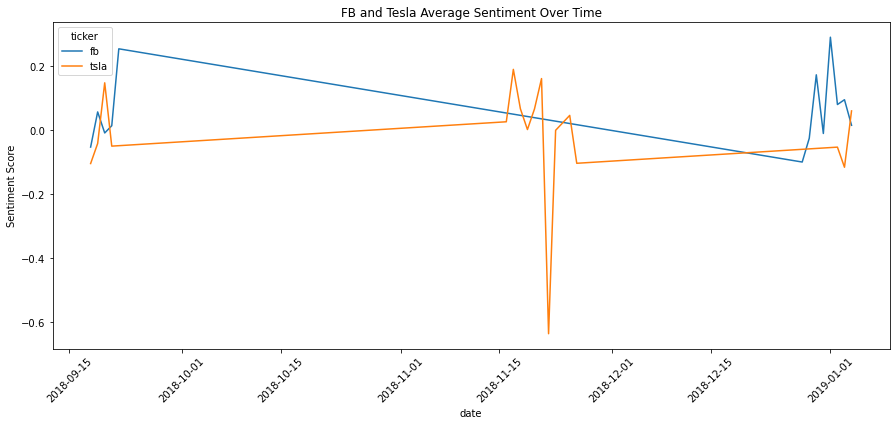

In [224]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = df3, x = 'date', y = 'compound', hue = 'ticker')
plt.ylabel('Sentiment Score')
plt.title('FB and Tesla Average Sentiment Over Time')
plt.xticks(rotation = 45)
plt.show()